# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [36]:
import pandas as pd
import numpy as np

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

In [37]:
data = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv',sep=',')

### Step 3. Assign it to a variable apple

In [38]:
apple = data

### Step 4.  Check out the type of the columns

In [39]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### Step 5. Transform the Date column as a datetime type

In [40]:
pd.to_datetime(apple['Date'])


0      2014-07-08
1      2014-07-07
2      2014-07-03
3      2014-07-02
4      2014-07-01
          ...    
8460   1980-12-18
8461   1980-12-17
8462   1980-12-16
8463   1980-12-15
8464   1980-12-12
Name: Date, Length: 8465, dtype: datetime64[ns]

### Step 6.  Set the date as the index

In [41]:
apple.set_index('Date',inplace=True)

### Step 7.  Is there any duplicate dates?

In [42]:
duplicated_dates = apple.index.duplicated()
apple.index[duplicated_dates]

Index([], dtype='object', name='Date')

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [43]:
apple.sort_index(inplace=True)
print(apple.head())

             Open   High    Low  Close     Volume  Adj Close
Date                                                        
1980-12-12  28.75  28.87  28.75  28.75  117258400       0.45
1980-12-15  27.38  27.38  27.25  27.25   43971200       0.42
1980-12-16  25.37  25.37  25.25  25.25   26432000       0.39
1980-12-17  25.87  26.00  25.87  25.87   21610400       0.40
1980-12-18  26.63  26.75  26.63  26.63   18362400       0.41


### Step 9. Get the last business day of each month

In [44]:
# Example DataFrame
df = pd.DataFrame({'Date': pd.date_range(start='2024-01-01', end='2024-12-31')})

# Get the last business day of each month
last_business_days = df.groupby(df['Date'].dt.to_period('M')).apply(lambda x: x['Date'].iloc[-1] if not x['Date'].iloc[-1].isoweekday() in [6,7] else x['Date'].iloc[-2])

# Print the last business day of each month
print(last_business_days)

Date
2024-01   2024-01-31
2024-02   2024-02-29
2024-03   2024-03-30
2024-04   2024-04-30
2024-05   2024-05-31
2024-06   2024-06-29
2024-07   2024-07-31
2024-08   2024-08-30
2024-09   2024-09-30
2024-10   2024-10-31
2024-11   2024-11-29
2024-12   2024-12-31
Freq: M, dtype: datetime64[ns]


### Step 10.  What is the difference in days between the first day and the oldest

In [45]:
difference_days = (apple.index[-1] - apple.index[0]).days
print(difference_days)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

### Step 11.  How many months in the data we have?

In [32]:
months_in_data = (newest_date.year - oldest_date.year) * 12 + (newest_date.month - oldest_date.month) + 1
print(months_in_data)

AttributeError: 'str' object has no attribute 'year'

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

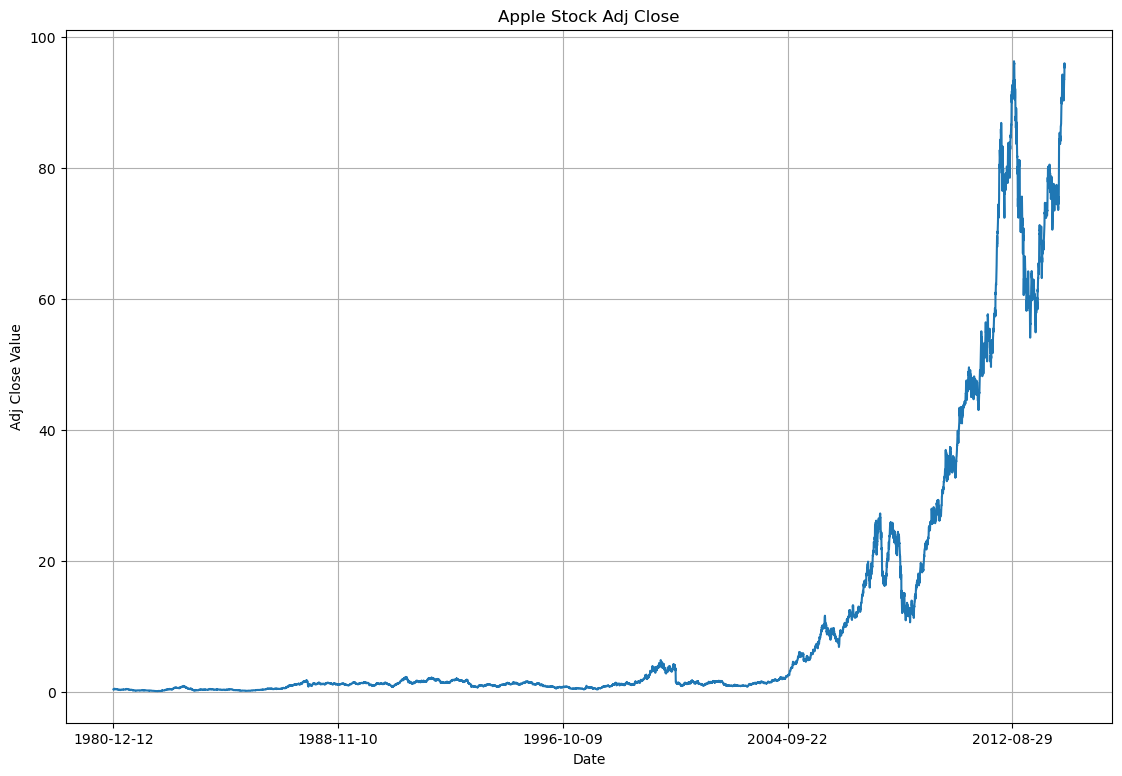

In [35]:
import matplotlib.pyplot as plt

# Plot 'Adj Close' values
plt.figure(figsize=(13.5, 9))
apple['Adj Close'].plot()
plt.title('Apple Stock Adj Close')
plt.xlabel('Date')
plt.ylabel('Adj Close Value')
plt.grid(True)
plt.show()